In [1]:
pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Atte

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

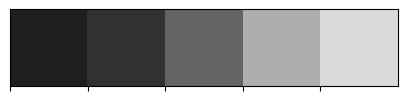

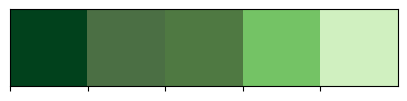

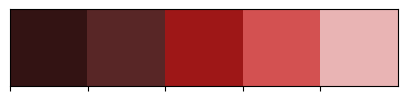

In [5]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [6]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [7]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    print(folderPath)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    print(folderPath)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

../input/brain-tumor-classification-mri/Training/glioma_tumor


100%|██████████| 826/826 [00:05<00:00, 137.83it/s]


../input/brain-tumor-classification-mri/Training/meningioma_tumor


100%|██████████| 822/822 [00:06<00:00, 135.04it/s]


../input/brain-tumor-classification-mri/Training/no_tumor


100%|██████████| 395/395 [00:02<00:00, 147.04it/s]


../input/brain-tumor-classification-mri/Training/pituitary_tumor


100%|██████████| 827/827 [00:06<00:00, 127.22it/s]


../input/brain-tumor-classification-mri/Testing/glioma_tumor


100%|██████████| 100/100 [00:00<00:00, 141.43it/s]


../input/brain-tumor-classification-mri/Testing/meningioma_tumor


100%|██████████| 115/115 [00:00<00:00, 162.44it/s]


../input/brain-tumor-classification-mri/Testing/no_tumor


100%|██████████| 105/105 [00:00<00:00, 229.22it/s]


../input/brain-tumor-classification-mri/Testing/pituitary_tumor


100%|██████████| 74/74 [00:00<00:00, 94.09it/s] 


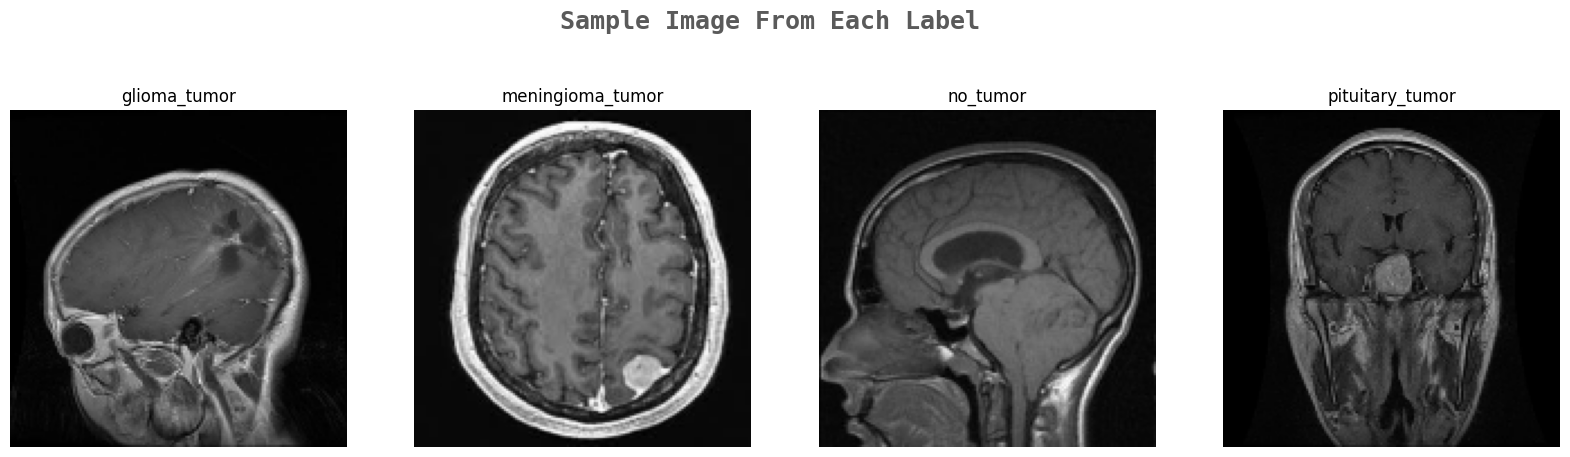

In [8]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [9]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [10]:
X_train.shape

(3264, 150, 150, 3)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=101)

In [12]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.utils import plot_model

In [14]:
# Define your model architecture
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

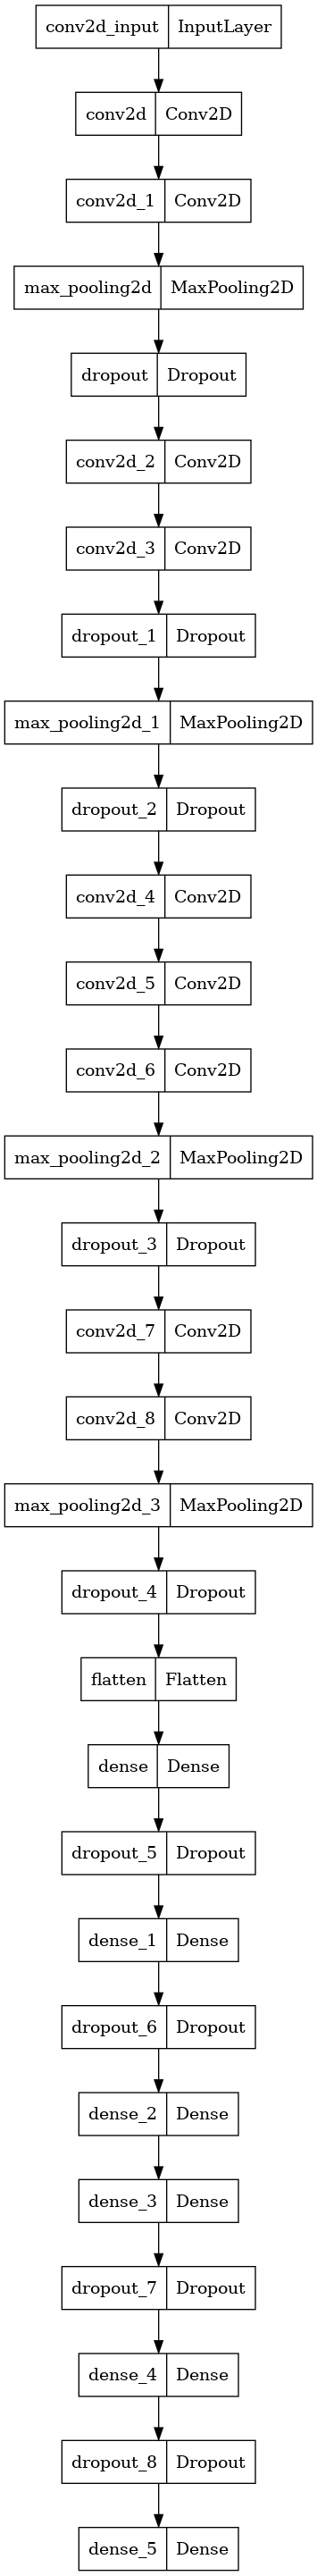

In [16]:
plot_model(model)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [18]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
83/83 [==============================] - 12s 56ms/step - loss: 1.4584 - accuracy: 0.2826 - val_loss: 1.3638 - val_accuracy: 0.2789
Epoch 2/100
83/83 [==============================] - 4s 45ms/step - loss: 1.3579 - accuracy: 0.2898 - val_loss: 1.3552 - val_accuracy: 0.2721
Epoch 3/100
83/83 [==============================] - 4s 45ms/step - loss: 1.3543 - accuracy: 0.2932 - val_loss: 1.3414 - val_accuracy: 0.3435
Epoch 4/100
83/83 [==============================] - 4s 44ms/step - loss: 1.3474 - accuracy: 0.3243 - val_loss: 1.3696 - val_accuracy: 0.2891
Epoch 5/100
83/83 [==============================] - 4s 45ms/step - loss: 1.3102 - accuracy: 0.3753 - val_loss: 1.2502 - val_accuracy: 0.4252
Epoch 6/100
83/83 [==============================] - 4s 44ms/step - loss: 1.1308 - accuracy: 0.4669 - val_loss: 1.0180 - val_accuracy: 0.5544
Epoch 7/100
83/83 [==============================] - 4s 44ms/step - loss: 0.9939 - accuracy: 0.5588 - val_loss: 1.0132 - val_accuracy: 0.5680
Epoch

In [19]:
# Save Model

model.save("model.h5")

In [20]:
# Load a previously saved model
model = tf.keras.models.load_model("model.h5")

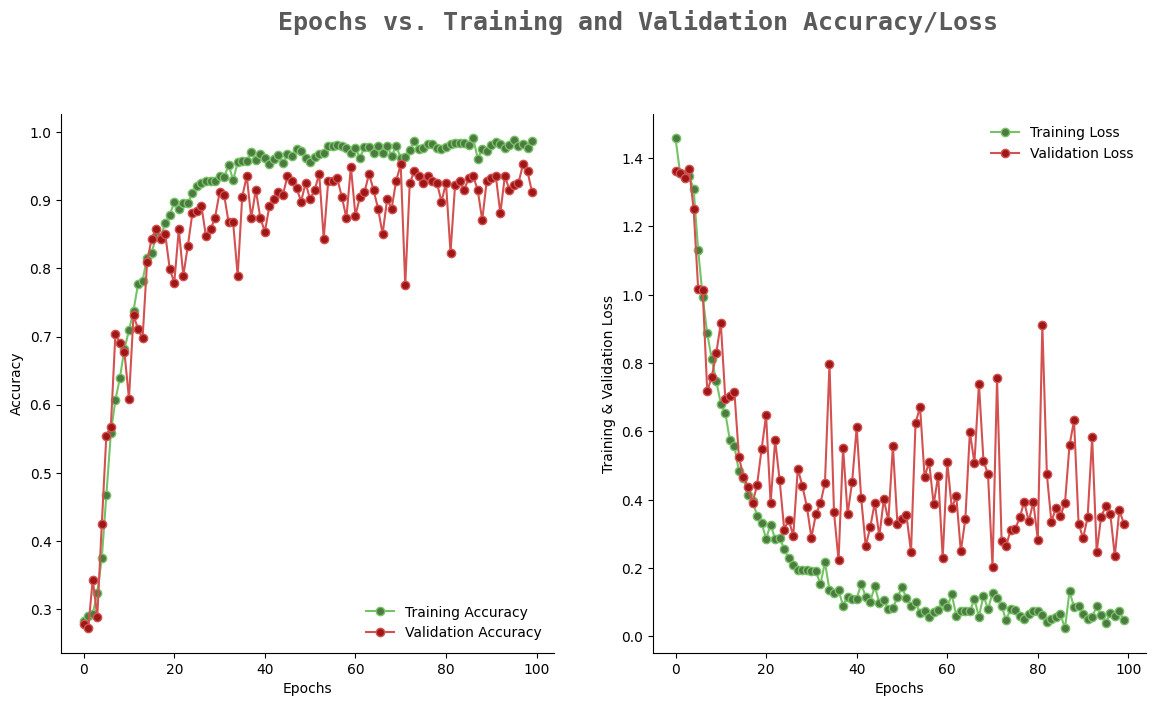

In [21]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

epochs = [i for i in range(100)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()


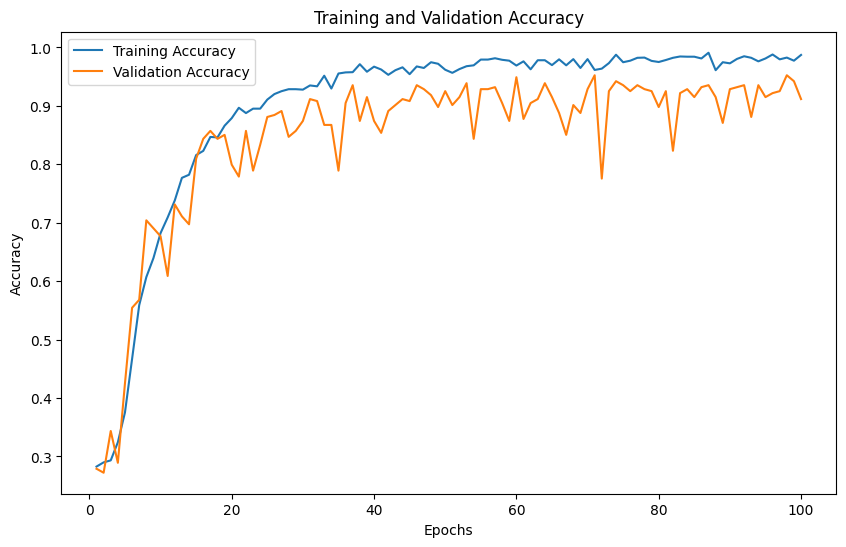

In [22]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs for x-axis
epochs_range = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Save the plot as an image file (e.g., PNG)
plt.savefig('accuracy_curve2.png')
plt.show()


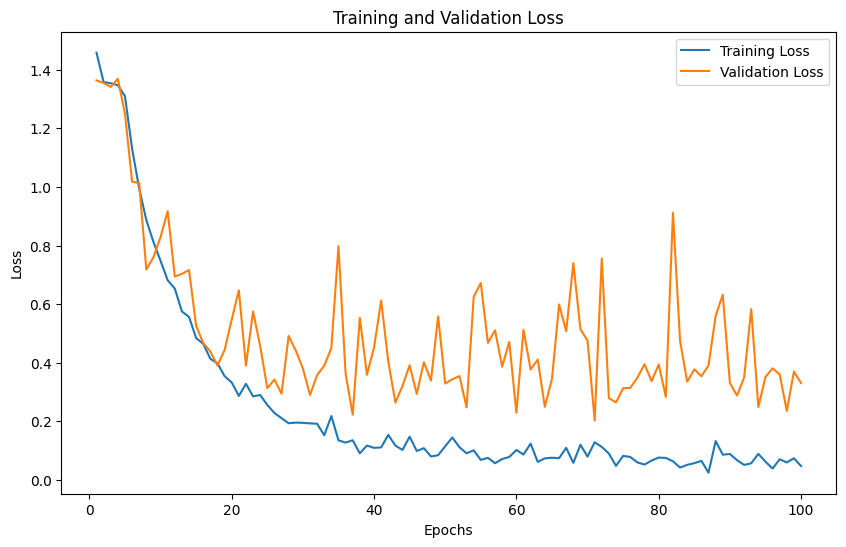

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs for x-axis
epochs_range = range(1, len(train_loss) + 1)

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Save the plot as an image file (e.g., PNG)
plt.savefig('loss_curve2.png')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


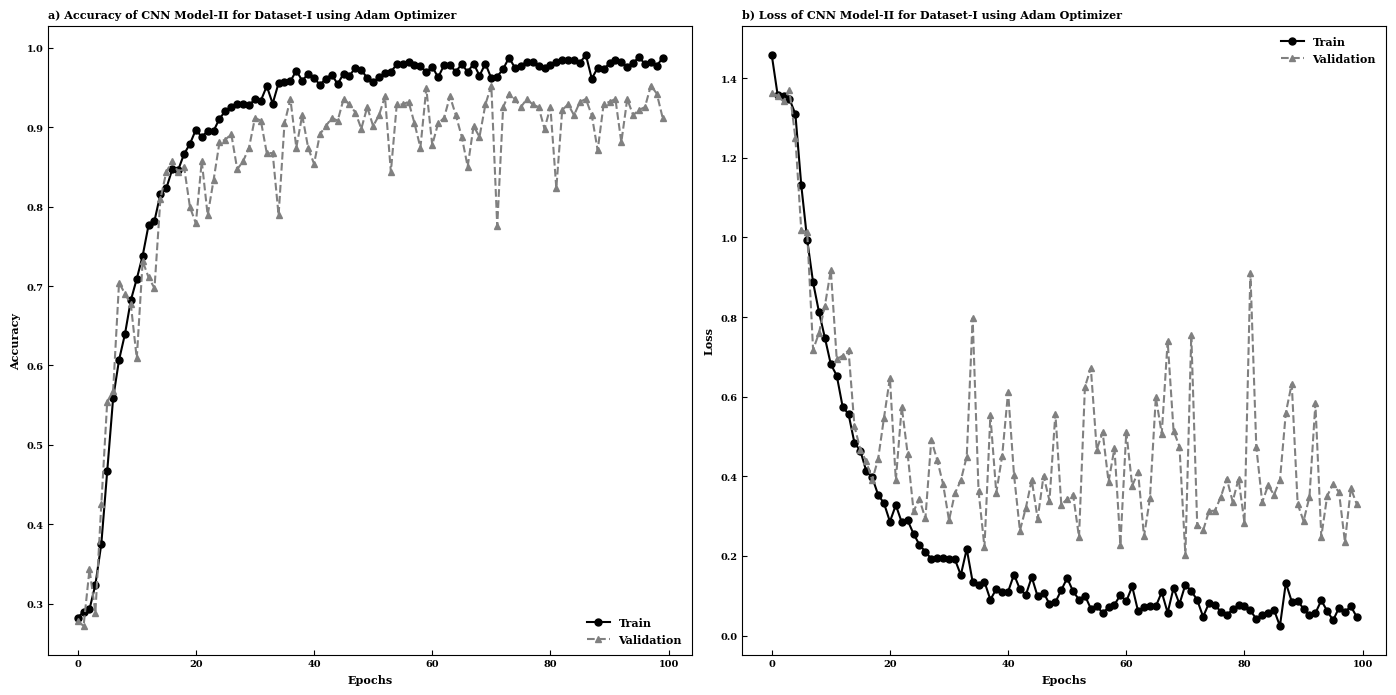

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(14, 7))  # Increase figsize for a larger plot

# Subplot 1: Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_accuracy'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('a) Accuracy of CNN Model-II for Dataset-I using Adam Optimizer', loc='left', weight='bold')

# Subplot 2: Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_loss'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
plt.title('b) Loss of CNN Model-II for Dataset-I using Adam Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performance.png", dpi=1000, bbox_inches='tight')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


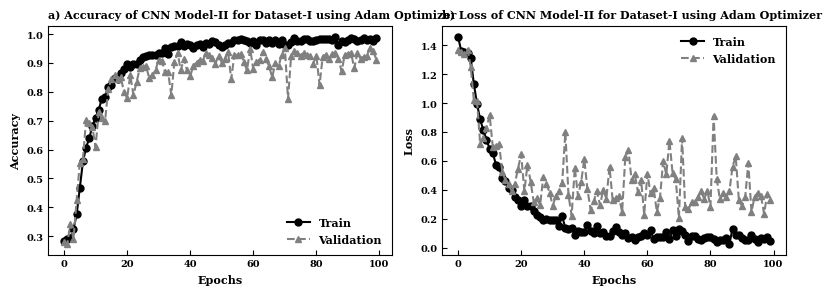

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(8, 3))  # Increase figsize for a larger plot

# Subplot 1: Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_accuracy'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('a) Accuracy of CNN Model-II for Dataset-I using Adam Optimizer', loc='left', weight='bold')

# Subplot 2: Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_loss'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
plt.title('b) Loss of CNN Model-II for Dataset-I using Adam Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performance2.png", bbox_inches='tight')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


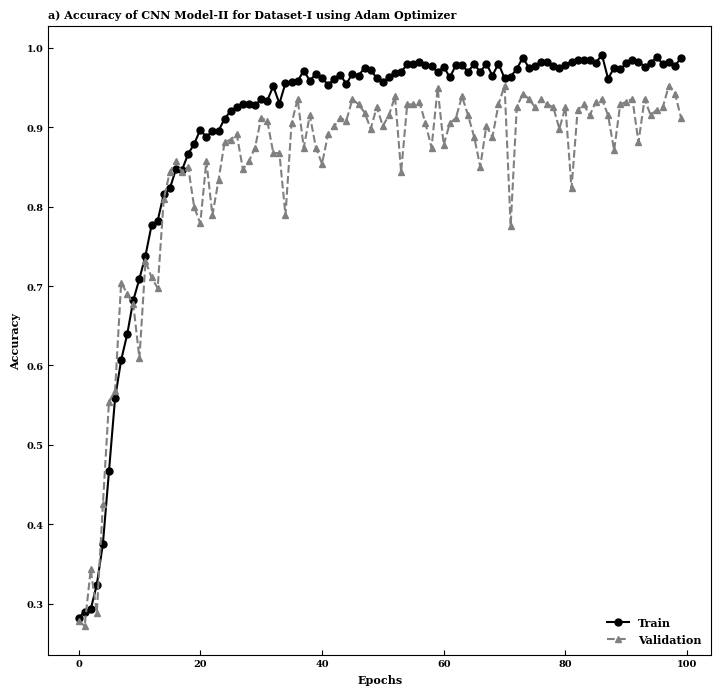

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(14, 7))  # Increase figsize for a larger plot

# Subplot 1: Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_accuracy'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('a) Accuracy of CNN Model-II for Dataset-I using Adam Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performance_accuracy.png", dpi=1000, bbox_inches='tight')
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


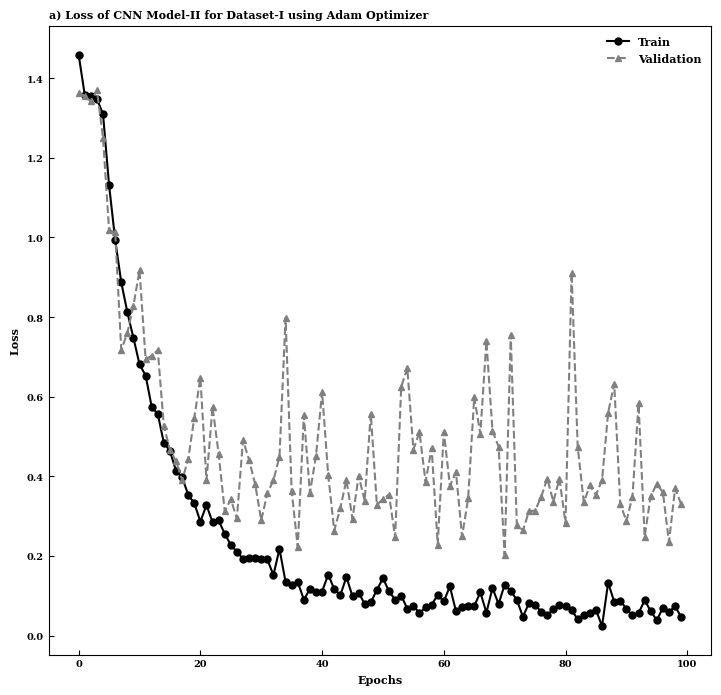

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Import rcParams from matplotlib

# Print the key values
print(history.history.keys())

# Set Parameters of plot
plt.rc('font', family='serif')
plt.rc('lines', lw=1.5)
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=8)
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Put frame around legend
plt.rcParams['legend.frameon'] = False

# All fonts made bold
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

# Start plotting
fig = plt.figure(figsize=(14, 7))  # Increase figsize for a larger plot


# Subplot 2: Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], color='k', ls='solid', marker='o', markersize=5, label='Train')
ax.plot(history.history['val_loss'], color='0.50', ls='dashed', marker='^', markersize=5, label='Validation')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
plt.title('a) Loss of CNN Model-II for Dataset-I using Adam Optimizer', loc='left', weight='bold')

# Save figure
plt.tight_layout()
plt.savefig("performanceloss.png", dpi=1000, bbox_inches='tight')
plt.show()

In [28]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 0s 22ms/step


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        93
           1       0.93      0.86      0.90        95
           2       0.90      0.90      0.90        52
           3       0.96      1.00      0.98        87

    accuracy                           0.92       327
   macro avg       0.92      0.92      0.92       327
weighted avg       0.92      0.92      0.92       327



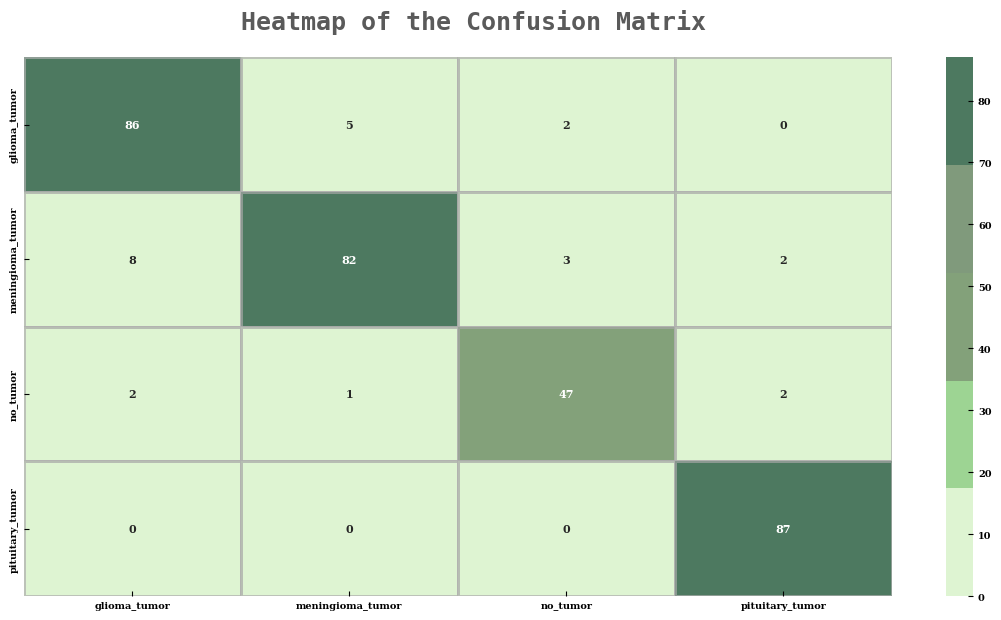

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test_new, pred)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(conf_mat, ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.92, x=0.28, alpha=0.8)

plt.show()


In [31]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 24.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


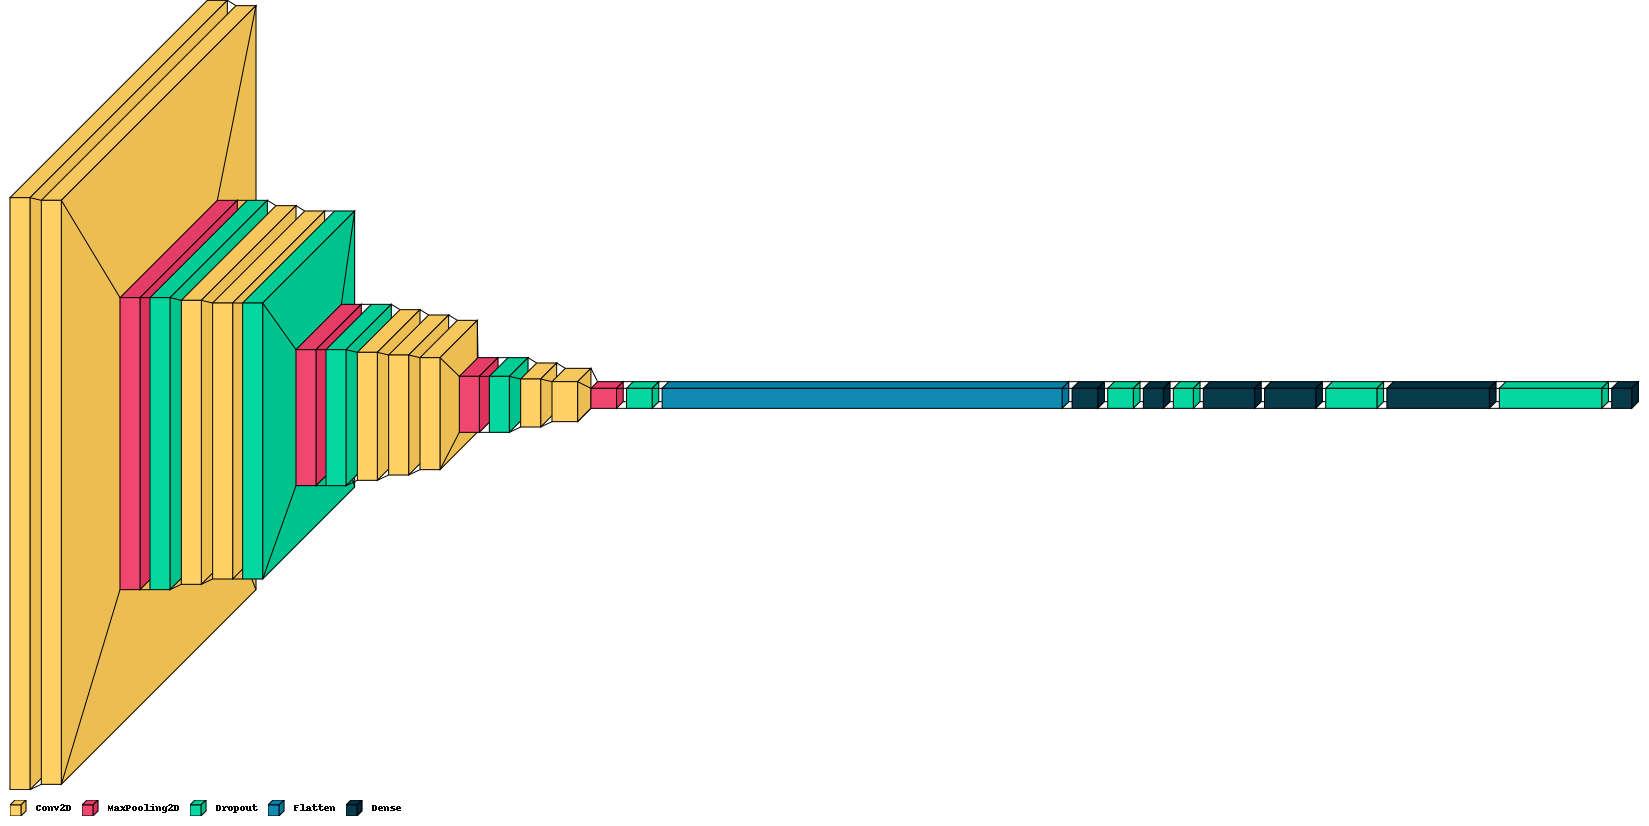

In [32]:
import visualkeras
from IPython.display import display

# Visualize the model's architecture
architecture_viz = visualkeras.layered_view(model, legend=True)

# Save the visualization as an image file (e.g., PNG)
architecture_viz.save('architecture.png')

# Display the visualization within the notebook
display(architecture_viz)